# 크라우드웍스 detection 데이터 labeling

## 1. 라이브러리 import 및 이미지 확인하기

In [1]:
!pip install -q matplotlib tqdm

In [2]:
import json
import cv2
import os
import numpy as np
from glob import glob, iglob
import pprint
import random

%matplotlib inline

import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
pp = pprint.PrettyPrinter(indent=4)

In [4]:
image_base_path = './data_labeling/테스트이미지/BUSAN1000/'

In [5]:
image_files = sorted(glob(image_base_path+'*.png'))

In [6]:
print(f'이미지 파일 갯수: {len(image_files)}')

이미지 파일 갯수: 1000


샘플 이미지 경로: ./data_labeling/테스트이미지/BUSAN1000/1838_vid5_00140.png
샘플 이미지 높이: 1080, 너비: 1920


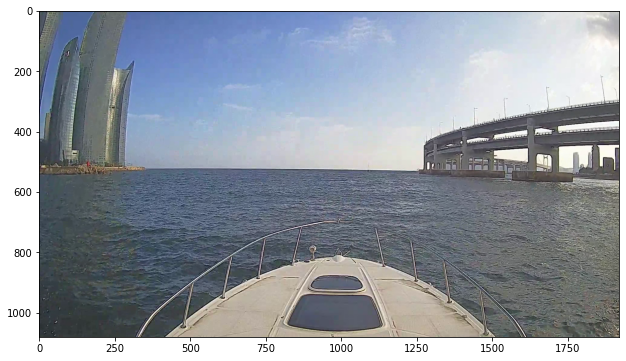

In [7]:
sample_image_path = image_files[0]
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
h, w = sample_image.shape[:2]

print(f"샘플 이미지 경로: {sample_image_path}")
print(f"샘플 이미지 높이: {h}, 너비: {w}")

plt.figure(figsize=(12, 6))
plt.imshow(sample_image)

## 2. 데이터헌트 detection json 파일 확인하기

In [8]:
detection_json_path = "./data_labeling/크라우드웍스/[크라우드웍스] detect_segment_json.json"

In [9]:
print(f"json 파일 유무: {os.path.exists(detection_json_path)}")

json 파일 유무: True


In [10]:
# 임시 json load
all_image_paths = []

with open(detection_json_path) as f:
    data = json.load(f)
#     pp.pprint(data)
    print(f"json key: {data.keys()}")
    
    for item1 in tqdm(data["result"]):
        for k, v in item1["name_VP1T4C"].items():
            if k == "sourceValue":
                all_image_paths.append((os.path.basename(v)))

json key: dict_keys(['projectID', 'result'])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 624338.20it/s]


In [11]:
all_image_paths[:10]

['1838_vid5_00140.png',
 '1838_vid5_00550.png',
 '1838_vid5_01210.png',
 '1838_vid5_01320.png',
 '1838_vid5_01600.png',
 '1838_vid5_01680.png',
 '1838_vid5_01730.png',
 '1838_vid5_01920.png',
 '1838_vid5_02540.png',
 '1838_vid5_03290.png']

## 3. 샘플 이미지에 bounding box 그리기

json key: dict_keys(['projectID', 'result'])
샘플 이미지 높이: 1080, 너비: 1920
{   'objectID': 'name_VP1T4C_77102121_1',
    'value': {   'annotation': 'BOX',
                 'coords': {   'bl': {   'x': 823.2295894258382,
                                         'y': 582.6129302296761},
                               'br': {   'x': 856.2452455199646,
                                         'y': 582.6129302296761},
                               'tl': {'x': 823.2295894258382, 'y': 570.96},
                               'tr': {'x': 856.2452455199646, 'y': 570.96}},
                 'extra': {   'color': '#e0182d',
                              'label': 'ship',
                              'value': 'ship'},
                 'object': {   'angle': 0,
                               'height': 11.652930229676045,
                               'left': 823.2295894258382,
                               'top': 570.96,
                               'width': 33.01565609412632},
                 'war

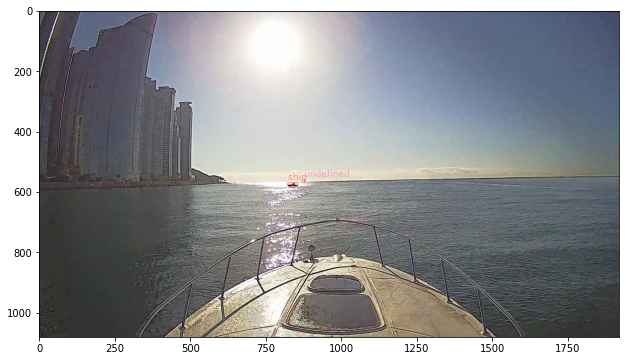

In [12]:
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 204),
    (255, 204, 0),
    (153, 51, 255),
]

label2idx = {
    'ship':0,
    'jetski':1,
    'buoy':2,
    'light buoy':3,
    'undefined':4
}

rand_idx = random.randint(0, 1000)

with open(detection_json_path) as f:
    data = json.load(f)
#     pp.pprint(data)
    print(f"json key: {data.keys()}")
    
    for i, item1 in enumerate(data["result"]):
        if i != rand_idx:
            continue
                
        for k, v in item1["name_VP1T4C"].items():
            
            if k == "sourceValue":
                image_path = image_base_path+os.path.basename(v)
            elif k == "data":
                labels = v
        
#         print(image_path)
#         pp.pprint(labels)
        
        image = cv2.imread(image_path)
        h, w = image.shape[:2]
        print(f"샘플 이미지 높이: {h}, 너비: {w}")
        
        for label in labels:
            pp.pprint(label)
            name = label['value']['extra']['label']
            bbox = label['value']['coords']
        
            lu_x = int(bbox['tl']['x'])
            lu_y = int(bbox['tl']['y'])
            rd_x = int(bbox['br']['x'])
            rd_y = int(bbox['br']['y'])
            
            cv2.rectangle(img=image,
                          pt1=(lu_x,lu_y),
                          pt2=(rd_x,rd_y),
                          color=colors[label2idx[name]],
                          thickness=1,
                          lineType=cv2.LINE_AA)

            cv2.putText(img=image,
                        text=name,
                        org=(lu_x, lu_y-10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1,
                        color=colors[label2idx[name]])

        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        break

## 4. 전체 이미지에 적용해서 저장하기

In [13]:
save_path = './data_labeling/크라우드웍스/draw_detect_bbox/'
os.makedirs(save_path, exist_ok=True)

In [15]:
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 204),
    (255, 204, 0),
    (153, 51, 255),
]


label2idx = {
    'ship':0,
    'jetski':1,
    'buoy':2,
    'light buoy':3,
    'undefined':4
}

target_names = set()

with open(detection_json_path) as f:
    data = json.load(f)
#     pp.pprint(data)
    print(f"json key: {data.keys()}")
    
    for item1 in tqdm(data["result"]):
        for k, v in item1["name_VP1T4C"].items():
            if k == "sourceValue":
                file_name = os.path.basename(v)
                image_path = image_base_path+os.path.basename(v)
            elif k == "data":
                labels = v
        
#         print(image_path)
#         pp.pprint(labels)
        image = cv2.imread(image_path)
        h, w = image.shape[:2]
#         print(f"샘플 이미지 높이: {h}, 너비: {w}")
        
        for label in labels:
#             pp.pprint(label)
            name = label['value']['extra']['label']
            bbox = label['value']['coords']
            
            target_names.add(name)
            
            lu_x = int(bbox['tl']['x'])
            lu_y = int(bbox['tl']['y'])
            rd_x = int(bbox['br']['x'])
            rd_y = int(bbox['br']['y'])
            
            cv2.rectangle(img=image,
                          pt1=(lu_x,lu_y),
                          pt2=(rd_x,rd_y),
                          color=colors[label2idx[name]],
                          thickness=1,
                          lineType=cv2.LINE_AA)

            cv2.putText(img=image,
                        text=name,
                        org=(lu_x, lu_y-10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1,
                        color=colors[label2idx[name]])

#         plt.figure(figsize=(12, 6))
#         plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        save_name = f"{save_path}{file_name}"
        cv2.imwrite(save_name, image)

json key: dict_keys(['projectID', 'result'])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:30<00:00, 11.10it/s]


## 5. 이미지 당 Label Count

In [17]:
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 204),
    (255, 204, 0),
    (153, 51, 255),
]

label2idx = {
    'ship':0,
    'jetski':1,
    'buoy':2,
    'light buoy':3,
    'undefined':4
}

cnts = np.array([0, 0, 0, 0, 0])

with open(detection_json_path) as f:
    data = json.load(f)
#     pp.pprint(data)
    print(f"json key: {data.keys()}")
    
    for item1 in tqdm(data["result"]):
        for k, v in item1["name_VP1T4C"].items():
            if k == "sourceValue":
                file_name = os.path.basename(v)
                image_path = image_base_path+os.path.basename(v)
            elif k == "data":
                labels = v
        
#         print(image_path)
#         pp.pprint(labels)
        image = cv2.imread(image_path)
        h, w = image.shape[:2]
#         print(f"샘플 이미지 높이: {h}, 너비: {w}")
        
        is_exists = np.array([False, False, False, False, False])
    
        for label in labels:
#             pp.pprint(label)
            name = label['value']['extra']['label']
            bbox = label['value']['coords']
            
            is_exists[label2idx[name]] = True
            
        cnts += is_exists

json key: dict_keys(['projectID', 'result'])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.90it/s]


In [19]:
print(f"이미지 당 Label 카운트: {cnts}")

이미지 당 Label 카운트: [857  65 373 284 392]
